# Glassdoor Salary Prediction Project

As our very first data science project, we have decided to dedicate it to the anticipation of our future in the data science field. In this project, we will be evaluating data science job opportunities in the United States; specifically, we will be prediciting the salaries of different positions depending on several factors. In this way, we could best prepare ourselves for the job opportunities to come (yes, we are optimistic people); in the sense that we will find out which factors play the most important roles and what salaries we should expect, and perhaps we will find more surprises along the way. 

# Procedure:

1. Cleaning the Data & Feature Engineering 
2. Visualizing/Getting to Know Our Data
3. Testing Different Models 
4. Fine-Tuning to Create the Best Model
5. Finally: Testing our Best Model


# Cleaning the Data & Feature Engineering

In [10]:
# First, let's import the necessary tools to proceed and load our datatset

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from sklearn.dummy import DummyRegressor
kf = KFold(n_splits=20, random_state=42, shuffle=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('dataset_glassdoor-jobs-scraper_2022-02-04.csv')

In [80]:
# Let's take a look at our data, shall we?

df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\r\n\r\nTitle: Data Engineer\r\n\r\n...,4.8,IGNW\r\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


Our objective for this project is to predict the salary of a job offer depending on its features. Therefore, our first task is to take care of the salary: we will remove any instances that do not display a salary, and we will create a separate column 
for the average of the salary renage provided in the "Salary Estimate" column; in this way, we can have a numerical column that we can actually predict the values of.

Additionally, we have noticed that some of the salaries are hourly while others are annually, and therefore, we will feature engineer a new column, "Salary_Per_Hour", that takes account of which salaries are annual and which salaries are hourly, as this may affect the salaries.

In [81]:
#making a column for whether a salary is per hour or annual

df['Salary_Per_Hour'] = df['Salary Estimate'].apply(lambda x: 'hourly' if 'per hour' in x.lower() else 'annually')

#removing all rows without salary

df = df[df['Salary Estimate'] != '-1']

#let's see how many instances we have left:

df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary_Per_Hour
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,annually
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,annually
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,annually
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",annually
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",annually
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",annually
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,annually
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,annually


Now, to get the exact average of the range of salaries provided, we will create two new columns, "Min_Salary" and "Max_Salary", to calculate it.

And then, we will create a new column, "Avg Salary", which will be the average of these two columns.

In [82]:
# our first objective is to remove any non-numerical character from the column and to save it under variable "salary"

salary=df['Salary Estimate']

without_kd=salary.apply(lambda x:x.lower().replace('k',' ').replace('$',' ').replace('(glassdoor est.)',' ').replace(' (employer est.)',' ').replace('employer provided salary:','').replace('per hour',''))

# making a min salary column and changing type to int

df['Min_Salary'] = without_kd.apply(lambda x: int(x.split('-')[0]))
df['Min_Salary'] =df.apply(lambda x:x['Min_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Min_Salary'],axis=1)

#making a max salary column and changing type to int

df['Max_Salary']=without_kd.apply(lambda x:x.split('-')[1])
df['Max_Salary']=df['Max_Salary'].astype('int')
df['Max_Salary'] =df.apply(lambda x:x['Max_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Max_Salary'],axis=1)


#making an average salary column

df['Avg Salary']=(df.Min_Salary+df.Max_Salary)/2

#let's take a loop!

df[['Salary_Per_Hour','Min_Salary','Max_Salary','Avg Salary']]


,Salary_Per_Hour,Min_Salary,Max_Salary,Avg Salary
0,annually,53.0,91.0,72.0
1,annually,63.0,112.0,87.5
2,annually,80.0,90.0,85.0
3,annually,56.0,97.0,76.5
4,annually,86.0,143.0,114.5
...,...,...,...,...
950,annually,58.0,111.0,84.5
951,annually,72.0,133.0,102.5
952,annually,56.0,91.0,73.5
953,annually,95.0,160.0,127.5


Next, we looked into some other columns that needed some cleaning. 

The first ones we looked at were Rating and Company, as we've noticed the Company company includes the rating in the name when the rating was included, so we decided to remove it for aesthetic's sake.

And then we proceeded to clean up the Rating column, noticing that there are a lot of missing values. We decided to fill those values with the average rating 

In [83]:
# remove rating from Company Name

df['Rating']=df['Rating'].astype('float')
df['Company Name']=df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4],axis=1)

# grabbing all non-missing values of ratings

ratingNoMinus=df[df['Rating']>0]
ratingNoMinus=ratingNoMinus['Rating']

# getting the average of the ratings

ratingNoMinusAvg=(ratingNoMinus.sum()/len(ratingNoMinus))
ratingNoMinusAvg=((ratingNoMinusAvg*10).astype('int')/10)

# filling all missing rating values with average rating

df['Rating']=df['Rating'].apply(lambda x:ratingNoMinusAvg if x<0 else x)

Next, we'll be moving onto the "Location" column. We decided that the exact city of a job offer is too broad for our objective, and therefore, we have decided to feature engineer a new column, "State", which as the name implies provides the state of the job posting.

In addition to that, we feature engineered another column, "Is_Headquarters", which checks if a job posting's location is the same as its headquarters, because that may have an effect on the salary.

In [84]:
# create a column for State, so we can simplify the location

df['State'] = df.apply(lambda x: 'Remote' if x['Location'].find(',') == -1  else x['Location'].split(',')[1],axis=1)


# create a column that checks if a job offer is in headquarters or not

df['Is_Headquarters']=df.apply(lambda x:0 if x['Headquarters']=='-1' else x['Headquarters'],axis=1)
df['Is_Headquarters']=df.apply(lambda x:0 if x['Location']!=x['Is_Headquarters'] else 1 ,axis=1)

Next, we'll be moving onto the "Founded" column. The important information that we derive from this column is how long a company has been around; the year is not the significant portion, but rather the age. Therefore, we will feature engineer a new column, "Age of Company", that will give us the relevant information.

As we've noticed there have been quite a bit of missing values in this column, we've decided to fill those values with the median age for these companies. We chose the median and not the average because we have a few outliers (we have a few very old companies, while the majority of companies are not very old)

In [85]:
# create age of company column

df['Age of Company'] = df.Founded.apply(lambda x: x if x<0 else 2022-x)

# getting all non-missing values of age of company

ageN=df[df['Age of Company']!=-1]

# getting the median value of age of company

ageN['Age of Company'].median()

# filling all missing values with the median (which we found is 30)

df['Age of Company']=df['Age of Company'].apply(lambda x:x if x!=-1 else 30 )

Next, we will be working with the "Description" column. On its own, each description is too specific to be useful to us; but we can extract some important information from the "Description" column.

We read through some of the descriptions to get a feel for what might be relevant. We've noticed that some descriptions mention certain tools that are relevant for the job posting, the frequent ones being: Python, Spark, AWS, and Excel. Therefore, we created a column for each of these tools to see in which ways they may affect the salary of the jobs (the columns check whether or not that tool is mentioned in the description; the columns use boolean values 1 and 0), as they can imply different roles/skillsets for a job. 

Another feature engineering we've done with this column is creating another column, 'Description Length' for the length of each description (number of words) to see how that may affect the salary.

In [86]:
# create new columns relating to job description 

# a column if Python is involved in job
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# a column if Spark is involved in job
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# a column if AWS is involved in job
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# a column if Excel is involved in job
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# create a new column for how many words are used per description

df['Description_Length']=df['Job Description'].apply(lambda x: len(x.split(' ')))

df[['Python','Spark','AWS','Excel','Description_Length']]

,Python,Spark,AWS,Excel,Description_Length
0,1,0,0,1,337
1,1,0,0,0,636
2,1,1,0,1,460
3,1,0,0,0,489
4,1,0,0,1,358
...,...,...,...,...,...
950,0,0,1,0,829
951,1,1,1,0,845
952,0,0,0,1,399
953,0,0,0,1,203


Next, we looked at yet another interesting and inciteful column, 'Job Title', and engineered this feature to extract more useful information to us. 

We engineered a new feature, 'Job Categories', which takes all of the job titles and categorizes them into distinct categories that are easier to work with. Since the creation of this new column is a bit more complex, we decided to create a function for it instead of using a short lambda function.

Another new feature we engineered is 'Seniority', as we've noticed that some Job Titles mention a Senior or Junior position, and that may have an effect on the salary. We created a function for that, too.

In [87]:
# simplify job titles into distinct categories with 'job categories column'

# function that divides each job title into a category

def job_categories(position):
    if 'data scientist' in position.lower():
        return 'Data Scientist'
    elif 'analyst' in position.lower() or 'analysis' in position.lower() or 'statistic' in position.lower():
        return 'Data Analyst'
    elif 'data engineer' in position.lower():
        return 'Data Engineer'
    elif 'software engineer' in position.lower():
        return 'Software Engineer'
    elif 'machine learning' in position.lower() or 'ml' in position.lower():
        return "Machine Learning Engineer"
    
    elif 'engineer' in position.lower():
        return 'Other Engineer'

    elif 'director' in position.lower():
        return 'Director'
    elif 'manager' in position.lower():
        return 'Manager'
    else:
        return 'Other'

# creating the job categories column

df['Job Categories'] = df['Job Title'].apply(job_categories)

df['Job Categories'].value_counts()

Data Scientist               279
Other                        152
Data Engineer                118
Data Analyst                 112
Machine Learning Engineer     24
Manager                       22
Other Engineer                17
Director                      14
Software Engineer              4
Name: Job Categories, dtype: int64

In [88]:
# function that divides each job title into its seniority status

def seniority(position):
    if 'senior' in position.lower() or 'sr' in position.lower() or 'lead' in position.lower() or 'principal' in position.lower():
        return "Senior"
    elif 'junior' in position.lower() or 'jr' in position.lower():
        return "Junior"
    else:
        return 'none'

# creating the seniority column
    
df['Seniority'] = df['Job Title'].apply(seniority)

df['Seniority'].value_counts()

none      519
Senior    220
Junior      3
Name: Seniority, dtype: int64

Next, we looked into the 'Competitors' column. We found this to be yet another column that could be helpful, but not on its own. We decided to feature engineer a new column, 'Competitor Count', that will give us how many competitors a company has, so we can use the numerical value of this feature and see if it has an affect on the salary. As there are frequently occuring missing values in this column, we decided to treat a missing value as though the company does not have any competitors.

In [89]:
df['Competitor Count']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

Finally, the last column we worked on is the 'Revenue'. Upon the visualization section of this project, we turned back to the cleaning process, as we realized the 'Revenue' column could provide us with a clearer pattern if we would divide it into three distinct categories as opposed to the ones provided. We created a new columb, 'Revenue_Adj', where we placed the revenues into the categories of 'big' (from 1 billion and beyond), 'medium (from 500 million to 1 billion, and 'small' (anything less than 500 million). We also had an 'Unknown/ Non-Applicable' category to take into account any missing values (or any Unknown / Non-Applicable values) in revenue, so as not to assign them to any of the other categories and alter the results.

In [90]:
# function to re-categorize the revenues into 4 distinct categories

def Cleaning_rev(position):
    if '-1' in position:
        return 'Unknown / Non-Applicable'
    elif 'bil' in position.lower() and 'mil' in position.lower():
        return 'medium'
    elif 'bil' in position.lower() and 'mil' not in position.lower():
        return 'big'
    elif 'unknown' in position.lower():
        return position
    else :
        return 'small'
    
# creating an adjusted column for revenue
    
df['Revenue_Adj']=df['Revenue'].apply(Cleaning_rev)

Since the rest of our data is categorical, and these categories would be used as dummy variables when we test our models, we decided it would be best not to remove any row with missing values for any categorical columns we haven't addressed, nor would it be wise to assign it to a category, as that would alter the results. Instead, we removed the dummy variables of the missing values later on when it was relevant (during model testing) and finished our base data cleaning & feature engineering here.

At this point, we saved our dataframe into a new csv:

df.to_csv('cleaned_glassdoor_dataset.csv') 

(did not code it again as to not overwrite the already-existing file)

Let's take a look at our cleaned data!

In [91]:
df = pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)

df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Python,Spark,AWS,Excel,Job Categories,Seniority,Description_Length,Competitor Count,Revenue_Adj
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,1,Data Scientist,none,337,0,small
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,Data Scientist,none,636,0,big
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,1,0,1,Data Scientist,none,460,0,small
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,Data Scientist,none,489,3,medium
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,1,Data Scientist,none,358,3,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,192,0,0,1,0,Other,Senior,829,3,big
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,16,1,1,1,0,Data Engineer,Senior,845,3,small
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,38,0,0,0,1,Other,none,399,0,Unknown / Non-Applicable
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,30,0,0,0,1,Manager,none,203,0,small


# Visualizing / Getting to Know Our Data


First and foremost, we split our data into train and test sets, so as to not leak the test set during visualization.

In [92]:
# splitting the data into train & test with random state of 777

train_set, test_set = train_test_split(df, test_size=0.2, random_state=777)

And then we saved each set to a csv like so:

train_set.to_csv('train_set.csv')

test_set.to_csv('test_set.csv')

In [93]:
# loading the train set

df=pd.read_csv('train_set.csv',index_col=0)

Let's get to know our numerical data a bit by looking at some interesting distributions using box plots!

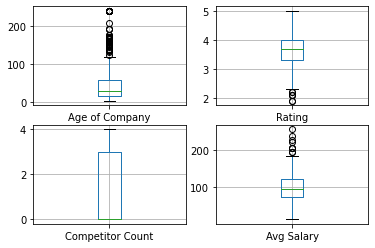

In [94]:
# 4 subplots of boxplots

fig, axes = plt.subplots(nrows=2, ncols=2) 

df.boxplot(column=['Age of Company'], ax=axes[0,0])
df.boxplot(column=['Rating'], ax=axes[0,1])
df.boxplot(column=['Competitor Count'], ax=axes[1,0])
df.boxplot(column=['Avg Salary'], ax=axes[1,1])


plt.show()

The boxplots above reveal the following:

1. The median Average Salary is almost 100k USD, with an interquartile range from around 75k USD to 125k USD. Our upper fence is around a whopping 180k USD, but the box plot reveals that there are quite a bit of outliers beyond that value, almost reaching to 300k USD. That's good news for us future data scientists!

2. The Competitor Count column does not have outliers, all of the values appear to be between 0 to 4 competitors, with a tendency to have less than more competitors.

3. The interquartile range of Ratings is from around 3.25 to 4 stars. There are a few outlier values of ratings, outliers below the lower fence of around 2.4 stars. 

4. The interquartile range of Age of Company seems to be at around 10 to 50 years old, yet the boxplot reveals that there are many outliers above the upper fence value of around 110 years old; some are even older than 200 years old!

With this new knowledge on our data, we decided to create yet another dataframe for comparison purposes: a dataset without the outliers in the Rating and Age of Company features, so as to see if we can more accurately predict our target.  


In [95]:
# load our original cleaned datatset

df2 =pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)

# create a variable for the rows with the outliers

numerical_columns = ['Age of Company','Rating']

# create variables for our quantile range (we picked these values so as to not to remove too many rows from our dataframe)

Q1 = df2[numerical_columns].quantile(0.15)
Q3 = df2[numerical_columns].quantile(0.85)
IQR = Q3 - Q1

# create a new dataframe without our outliers

df_filtered = df2[~((df2[numerical_columns] < (Q1 - 1.5 * IQR)) |(df2[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

And then we saved the results into a csv:

df_filtered.to_csv('no_outlier_cleaned_data.csv')

Now let's revert back to our data visualizations. 

It is vital to see the correlations between our features as well as their correlations to our target. We will begin by looking at the correlations of our numerical features.

In [96]:
df[['Avg Salary','Age of Company','Rating','Description_Length','Competitor Count']].corr()

,Avg Salary,Age of Company,Rating,Description_Length,Competitor Count
Avg Salary,1.000000,-0.000873,0.132609,0.083286,0.055996
Age of Company,-0.000873,1.000000,-0.100111,0.136811,0.122526
Rating,0.132609,-0.100111,1.000000,-0.056818,-0.038808
Description_Length,0.083286,0.136811,-0.056818,1.000000,0.123123
Competitor Count,0.055996,0.122526,-0.038808,0.123123,1.000000


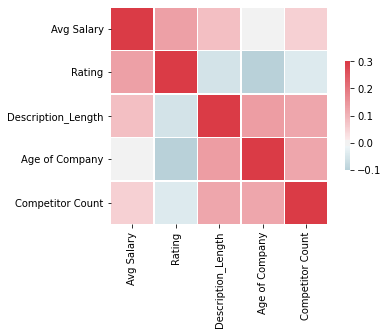

In [97]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company','Competitor Count']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

Let's note some interesting points:

1. Average Salary has the strongest correlation with Rating, and it is a positive correlation (0.13). Description Length and Competitor Count also have a positive correlation to Average Salary, albeit a weaker one. Age of Company has very weak negative correlation with Average Salary. 

2. Rating has a negative correlation with all of the other features, the strongest one being Age of Company. 

3. Age of Company has a positive correlation with both Description Length and Competitor Count. 

4. Description Length has a positive correlation with Competitor Count

What are the implications of these notes?

Older companies tend to have longer descriptions for job postings, and they have gathered more competitors over the years than younger companies. Due to the correlation of competitors and description length of job postings, it may be that the elaborate job descriptions are used to set apart a company from its competitors. However, while an older company may try to appeal using its job description, or perhaps to demand more from employees, they tend to have a lower rating and in turn a lower salary.

However, job companies with longer descriptions and more competitors do tend to pay more, perhaps because the longer descriptions are more demanding, or perhaps to set them apart from their competition.

Next, let's visualize our categorical data

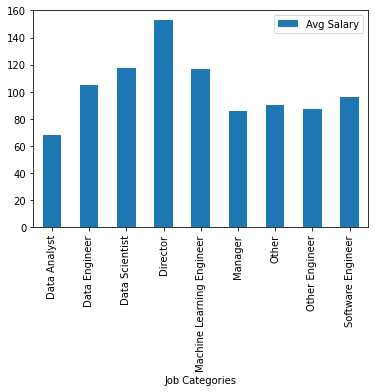

In [98]:
# bar graph of average salary by job category

job_cat = pd.pivot_table(df, index =['Job Categories'], values='Avg Salary')

job_cat.plot(kind='bar')

In [102]:
# table of job categories, divided by seniority status

job_cat=pd.pivot_table(df,index=['Job Categories', 'Seniority'],values='Avg Salary')

job_cat

Avg Salary
Job Categories            Seniority            
Data Analyst              Junior      53.250000
                          Senior      84.428571
                          none        61.163934
Data Engineer             Senior     124.200000
                          none        96.181159
Data Scientist            Junior     106.500000
                          Senior     138.183099
                          none       107.639073
Director                  none       152.772727
Machine Learning Engineer Senior     127.000000
                          none       109.500000
Manager                   none        86.058824
Other                     Senior     113.472973
                          none        80.312500
Other Engineer            Senior      86.300000
                          none        87.625000
Software Engineer         none        96.250000

The above visualizations reveal the different categories have varying average salaries. Data Analysts, on average, earn significantly less than other categories, while Directors earn significantly more.

It also appears that seniority status tends to also provide higher salaries (that rule does not always apply, but it does most of the time) per job category.

We can expect that these two features will be important.

In [107]:
# create a table for job sector (we will loop at the top 5 and bottom 5)

job_sec=pd.pivot_table(df,index=['Sector'],values='Avg Salary').sort_values('Avg Salary',ascending=True)


job_sec.head()

# i want these side by side

,Avg Salary
Sector,
"Arts, Entertainment & Recreation",48.500000
"Construction, Repair & Maintenance",66.250000
Travel & Tourism,70.300000
Non-Profit,74.285714
"Oil, Gas, Energy & Utilities",81.500000


In [109]:
job_sec2=pd.pivot_table(df,index=['Sector'],values='Avg Salary').sort_values('Avg Salary',ascending=False).drop('-1')

job_sec2.head()

,Avg Salary
Sector,
Accounting & Legal,113.500000
Biotech & Pharmaceuticals,113.089888
Media,110.800000
Information Technology,109.963768
Real Estate,108.700000


In [111]:
# create a table for job industry (we will loop at the top 5 and bottom 5)

job_industry=pd.pivot_table(df,index=['Industry'],values='Avg Salary').sort_values('Avg Salary',ascending=False)

job_industry.head()

,Avg Salary
Industry,
Other Retail Stores,163.500000
Financial Analytics & Research,145.857143
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000


In [112]:
job_industry2=pd.pivot_table(df,index=['Industry'],values='Avg Salary').sort_values('Avg Salary',ascending=True)

job_industry2.head()

,Avg Salary
Industry,
Telecommunications Manufacturing,44.000000
Architectural & Engineering Services,47.166667
Gambling,48.500000
Social Assistance,48.500000
Food & Beverage Manufacturing,53.250000


As seen above, in the Industry and Sector features, there is quite a big gap between the average salaries of the top 5 industries/sectors and the bottom 5 industries/sectors. This variability in these two features implies that they may play an important role in determining the average salary. 

And side note, a little suggestion: try to avoid working in the Telecommunication Manufactoring industry or under the Arts, Entertainment & Recreation sector

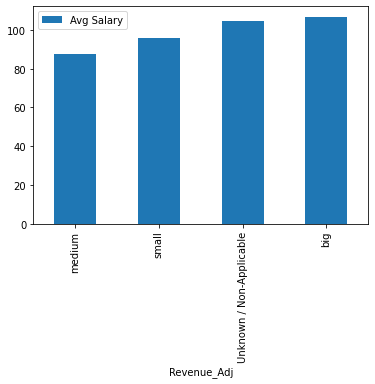

In [117]:
# create a bar graph for our adjusted revenue column

rev = pd.pivot_table(df, index=['Revenue_Adj'], values='Avg Salary').sort_values('Avg Salary',ascending=True)

rev.plot(kind='bar')

This bar graph displaying the average salaries per revenue category reveals that the companies with the most revenue pay the highest on average, but the companies with medium sized revenues pay the lowest on average. There is not a dramatic difference between the average salaries, but it is worth noting. 

In [119]:
# create a table that compares the average salary by different combinations of necessary job tools (python, spark, aws, excel)

job_tools=pd.pivot_table(df,index=['Python', 'Spark', 'AWS', 'Excel'],values='Avg Salary')

job_tools

Avg Salary
Python Spark AWS Excel            
0      0     0   0       92.354167
                 1       83.022917
             1   0       81.107143
                 1      102.333333
       1     0   0       47.000000
                 1       95.388889
             1   0      130.857143
                 1      106.300000
1      0     0   0      112.264286
                 1      106.164706
             1   0      119.365385
                 1      111.100000
       1     0   0      106.839286
                 1      113.821429
             1   0      123.683333
                 1      109.884615

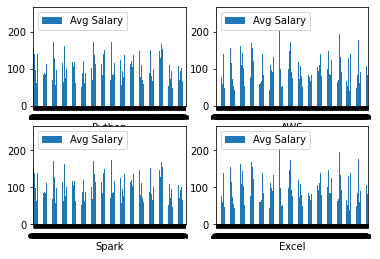

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=2) 

df.plot.bar(x='Python', y='Avg Salary', ax=axes[0,0])
df.plot.bar(x='AWS',  y='Avg Salary',ax=axes[0,1])
df.plot.bar(x='Spark',  y='Avg Salary', ax=axes[1,0])
df.plot.bar(x='Excel',  y='Avg Salary',ax=axes[1,1])


plt.show()

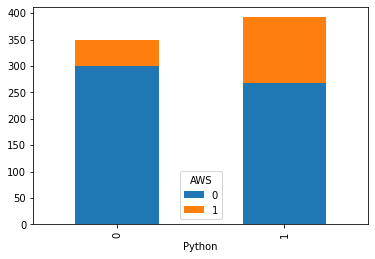

In [122]:
ax1 = df2.groupby(['Python'])['AWS'].value_counts().unstack().plot(kind='bar',stacked = True)

The above table displays the average salary for each combination of job tools mentioned/demanded for the job, as given by the job description. ....

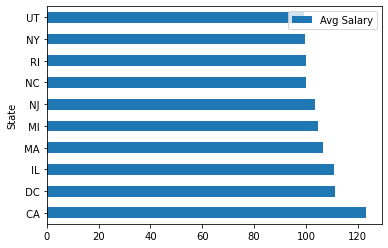

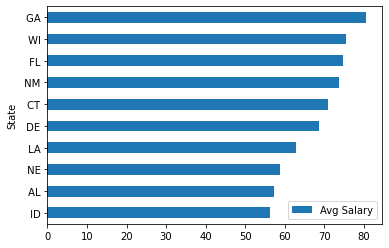

In [125]:
# plotting the top 10 highest paying states and the top 10 lowest paying states

states = pd.pivot_table(df, index = 'State', values='Avg Salary').sort_values('Avg Salary',ascending=False).head(10)
states2 = pd.pivot_table(df, index = 'State', values='Avg Salary').sort_values('Avg Salary',ascending=True).head(10)


states.plot(kind='barh')

states2.plot(kind='barh')

The above graphs reveal that there is great variability in the average salary depending on the state the company is in. California, the highest paying state, is paying more than DOUBLE the average salary of Idaho, the lowest paying state; there is around a 70k USD difference, which is very monumental. The state of a job offer may therefore be of significance.
Tip: move to California!

To look into some correlations between the categorical features, we turned them into dummy variables

In [127]:
dfDummies = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))

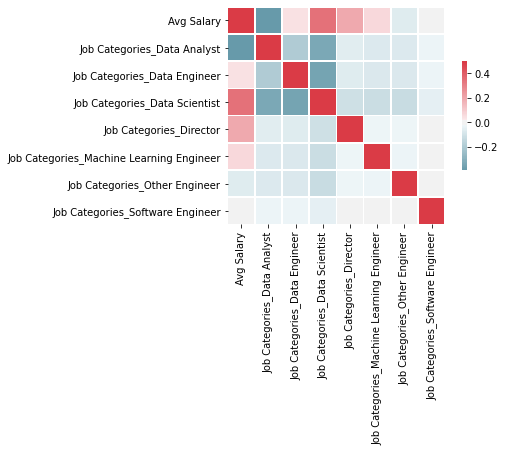

In [131]:
# heatmap of correlations between job categories and average salary

sns.heatmap(dfDummies[['Avg Salary', 'Job Categories_Data Analyst',
       'Job Categories_Data Engineer', 'Job Categories_Data Scientist',
       'Job Categories_Director', 'Job Categories_Machine Learning Engineer',
       'Job Categories_Other Engineer', 'Job Categories_Software Engineer']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

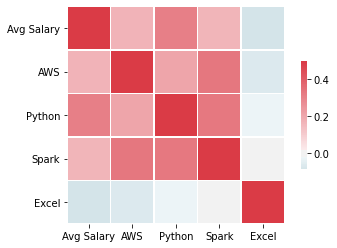

In [132]:
# heatmap of correlations between average salary and job tools

sns.heatmap(dfDummies[['Avg Salary','AWS','Python','Spark','Excel']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

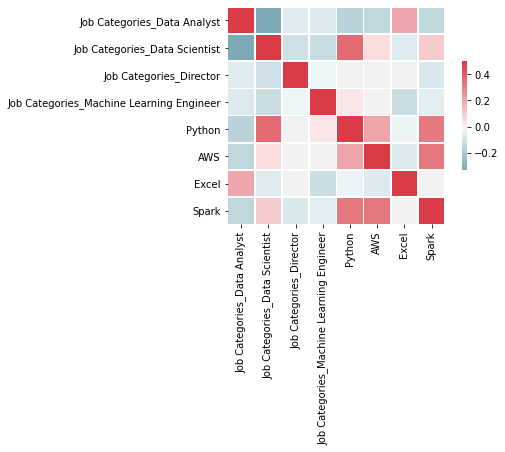

In [129]:
# heatmap of correlation between some job categories and job tools

sns.heatmap(dfDummies[['Job Categories_Data Analyst', 'Job Categories_Data Scientist',
       'Job Categories_Director', 'Job Categories_Machine Learning Engineer','Python','AWS','Excel','Spark']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

These above correlations are revealing of some very important things:

1. Some of the job categories have high correlations (either negative or positive) with the average salary, and therefore, this feature is important. Data Analysts have a strong negative correlation with average salary, while Data Scientists and Directors have a strong positive correlation with average salary. Engineering positions that are NOT ML Engineers seem to have little to no affect on the salary.

2. The job tools of AWS, Spark, and Python have a very strong positive correlation to average salary as well as to each other! It appears that these tools are often required together, and their requirement results in a higher salary. Meanwhile, Excel has a weak negative correlation to average salary.

3. Certain job categories have a correlation with some job tools. Python has a high positive correlation with Data Scientists, while Data Scientist job descriptions are less likely to include Excel. On the other hand, Excel has a positive correlation with Data Analysts, while the other tools are less likely to be included in a job description for Data Analysis. 

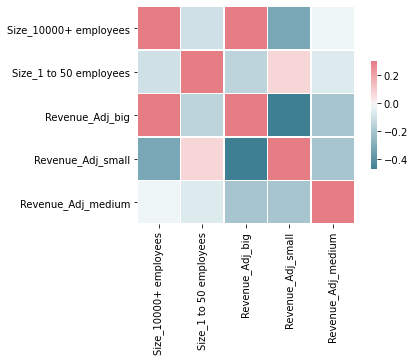

In [133]:
# heatmap of correlation between size of company and revenue

sns.heatmap(dfDummies[['Size_10000+ employees','Size_1 to 50 employees','Revenue_Adj_big','Revenue_Adj_small','Revenue_Adj_medium']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

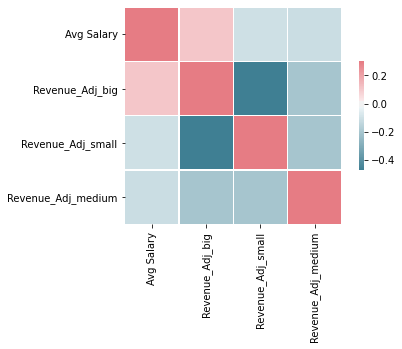

In [134]:
# heatmap of correlation between revenue and average salary

sns.heatmap(dfDummies[['Avg Salary','Revenue_Adj_big','Revenue_Adj_small','Revenue_Adj_medium']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

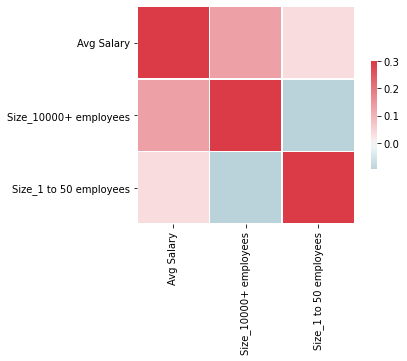

In [135]:
# heatmap of correlations between size of company and average salary

sns.heatmap(dfDummies[['Avg Salary','Size_10000+ employees','Size_1 to 50 employees']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

The above correlations reveal that there is definitely a correlation between the two features, but they are not interchangeable features. 
Large companies tend to have a lot of revenue as well, while small companies are most likely to not have a lot of revenue. 

However, when it comes to the features' correlations with the average salary, we note that big companies have a positive correlation with average salary but both medium and small sized revenues have a negative correlation with average salary.

On the other hand, both small and big companies have a positive correlation with average salary (though it is important to note that larger companies have a stronger correlation). 

Therefore, though these features appear 'similar', they have different nuances in the way that they affect the average salary, and therefore, we will keep them both for the model testing.

# Testing Different Models

In [2]:
# train test split on regular cleaned data frame

# load the dataframe

df=pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)

# create dummy variables and drop any unnecessary columns

df_n = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))

# divide into X and y (and dropping unnecessary dummy columns)

X = df_n.drop(['Avg Salary', 'Size_-1','Sector_-1','Industry_-1'], axis=1)
y = df_n['Avg Salary'].values

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

# let's see

X_train


,Rating,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Description_Length,Competitor Count,Size_1 to 50 employees,...,Job Categories_Other,Job Categories_Other Engineer,Job Categories_Software Engineer,Seniority_Junior,Seniority_Senior,Seniority_none,Revenue_Adj_Unknown / Non-Applicable,Revenue_Adj_big,Revenue_Adj_medium,Revenue_Adj_small
318,3.2,0,30,1,1,1,1,208,0,1,...,0,0,0,0,1,0,0,0,0,1
533,3.6,1,33,1,0,1,1,753,0,0,...,0,0,0,0,0,1,1,0,0,0
539,3.1,1,147,0,0,0,1,698,0,0,...,0,0,0,0,1,0,0,1,0,0
653,4.2,0,14,1,0,0,1,765,0,0,...,0,0,0,0,0,1,1,0,0,0
586,3.5,0,30,1,0,0,0,158,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,3.5,0,25,1,1,0,0,151,3,0,...,0,0,0,0,0,1,1,0,0,0
79,3.6,1,95,1,0,0,1,370,0,0,...,0,0,0,0,0,1,0,1,0,0
759,2.8,1,50,0,0,0,0,481,3,0,...,0,0,0,0,0,1,0,0,1,0
730,3.6,0,171,0,1,1,1,541,0,0,...,1,0,0,0,0,1,0,1,0,0


In [3]:
# train test split on cleaned data frame without outliers

# load the dataframe 

df2 = pd.read_csv('no_outlier_cleaned_data.csv',index_col=0)

# create dummy variables and drop any unnecessary columns

df_n2 = pd.get_dummies(df2.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))

# divide into X and y (and dropping unnecessary dummy columns)

X2 = df_n2.drop(['Avg Salary', 'Size_-1','Sector_-1','Industry_-1'], axis=1)
y2 = df_n2['Avg Salary'].values

# train test split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=777)

# let's see

X2_train

,Rating,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Description_Length,Competitor Count,Size_1 to 50 employees,...,Job Categories_Other,Job Categories_Other Engineer,Job Categories_Software Engineer,Seniority_Junior,Seniority_Senior,Seniority_none,Revenue_Adj_Unknown / Non-Applicable,Revenue_Adj_big,Revenue_Adj_medium,Revenue_Adj_small
325,2.8,1,8,1,0,0,1,777,0,0,...,0,0,0,0,1,0,1,0,0,0
674,4.4,1,38,1,0,0,0,345,0,0,...,0,0,0,0,1,0,0,1,0,0
396,3.3,1,14,0,0,0,0,232,0,0,...,0,0,0,0,0,1,1,0,0,0
895,3.3,1,34,0,0,0,1,1017,3,0,...,0,0,0,0,0,1,0,1,0,0
859,3.2,1,64,1,0,0,1,575,3,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,3.5,1,17,1,1,1,1,569,0,0,...,0,0,0,0,0,1,1,0,0,0
80,2.7,0,44,0,0,0,1,319,0,0,...,1,0,0,0,0,1,0,0,0,1
782,4.2,1,11,1,0,0,1,668,0,0,...,0,0,0,0,0,1,1,0,0,0
745,3.9,1,13,1,0,0,1,420,0,0,...,0,0,0,0,1,0,0,0,0,1


As aforementioned in the data visualization portion, we've decided to test the models with both the dataframe without the outliers and the one with the outliers to see if there is any affect on our results.

Another thing that may affect the results is scaling our data. We tried three scaling methods: standarization, normalization and robust scaling (the robust scaling is meant to take care of our outlier values in case they skew our results with the other scalers). 

In [4]:
numerical_columns = ['Rating', 'Age of Company', 'Description_Length', 'Competitor Count']

In [5]:
# Normalization of train & test:

normal = MinMaxScaler()

X_test_norm = X_test.copy()
X_train_norm = X_train.copy()

X_train_norm[numerical_columns] = normal.fit_transform(X_train_norm[numerical_columns])
X_test_norm[numerical_columns] = normal.transform(X_test_norm[numerical_columns])

# let's see the values 

print(X_train_norm.mean(axis=0))

Rating                                  0.579013
Is_Headquarters                         0.576728
Age of Company                          0.195665
Python                                  0.527825
Spark                                   0.227656
                                          ...   
Seniority_none                          0.696459
Revenue_Adj_Unknown / Non-Applicable    0.276560
Revenue_Adj_big                         0.322091
Revenue_Adj_medium                      0.080944
Revenue_Adj_small                       0.320405
Length: 166, dtype: float64


In [6]:
# Standardization of train & test:

standard = StandardScaler()

X_test_stand = X_test.copy()
X_train_stand = X_train.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()


X_train_stand[numerical_columns] = standard.fit_transform(X_train_stand[numerical_columns])
X_test_stand[numerical_columns] = standard.transform(X_test_stand[numerical_columns])

# let's see the values

print(X_train_stand.mean(axis=0))

Rating                                 -1.018485e-16
Is_Headquarters                         5.767285e-01
Age of Company                         -2.883210e-17
Python                                  5.278246e-01
Spark                                   2.276560e-01
                                            ...     
Seniority_none                          6.964587e-01
Revenue_Adj_Unknown / Non-Applicable    2.765599e-01
Revenue_Adj_big                         3.220911e-01
Revenue_Adj_medium                      8.094435e-02
Revenue_Adj_small                       3.204047e-01
Length: 166, dtype: float64


In [7]:
# Robust Scaling of train & test:

robust = RobustScaler()

X_test_robust = X_test.copy()
X_train_robust = X_train.copy()

X_train_robust[numerical_columns] = robust.fit_transform(X_train_robust[numerical_columns])
X_test_robust[numerical_columns] = robust.transform(X_test_robust[numerical_columns])

# let's see the values 

print(X_train_robust.mean(axis=0))

Rating                                 -0.007227
Is_Headquarters                         0.576728
Age of Company                          0.455077
Python                                  0.527825
Spark                                   0.227656
                                          ...   
Seniority_none                          0.696459
Revenue_Adj_Unknown / Non-Applicable    0.276560
Revenue_Adj_big                         0.322091
Revenue_Adj_medium                      0.080944
Revenue_Adj_small                       0.320405
Length: 166, dtype: float64


Now that we have prepared several versions of our data frame, we will create a dummy model by which to establish a standard for how our models are doing. To elaborate, the role of the dummy model is to give us an idea of what 'score' values of a completely random model would be; if our models align with these scores, or are worse than these scores, they are doing very poorly.

In [8]:
dummy_model = DummyRegressor()

dummy_model.fit(X_train, y_train)

R2 = dummy_model.score(X_test, y_test)

y_predict = dummy_model.predict(X_test)

mae = MAE(y_test, y_predict)

print('Dummy Model Scores:')
print(f'R-Squared Value: {R2}') 
print(f'Mean Absolute Error: {mae}')

Dummy Model Scores:
R-Squared Value: -0.007879122082713241
Mean Absolute Error: 30.284736919542315


Let's keep these scores in mind as we navigate through our models, striving to get a Mean Absolute Error that is smaller than 30 thousand dollars and an R-Squared value that is, well, closer to 1 than to 0.

# Linear Regression Model

In [9]:
linear_reg1 = LinearRegression()
linear_reg2 = LinearRegression()
linear_reg3 = LinearRegression()
linear_reg4 = LinearRegression()

# each linear regression represents a different 'version' of our data

linear_reg1.fit(X_train,y_train)
linear_reg2.fit(X_train_norm,y_train)
linear_reg3.fit(X_train_stand,y_train)
linear_reg4.fit(X2_train,y2_train)

# cross validation for mean absolute error 

lrm = np.mean(cross_val_score(linear_reg1, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf))

norm_lrm = np.mean(cross_val_score(linear_reg2, X_train_norm, y_train, scoring='neg_mean_absolute_error', cv=kf))

stand_lrm = np.mean(cross_val_score(linear_reg3, X_train_stand, y_train, scoring='neg_mean_absolute_error', cv=kf))

out_lrm = np.mean(cross_val_score(linear_reg4, X2_train, y2_train, scoring='neg_mean_absolute_error', cv=kf))

# cross validation for r-squared

r2_lin= np.mean(cross_val_score(linear_reg1, X_train, y_train, cv=kf))

stand_r2 = np.mean(cross_val_score(linear_reg3, X_train_stand, y_train, cv=kf))

norm_r2 = np.mean(cross_val_score(linear_reg2, X_train_stand, y_train, cv=kf))

r2out = np.mean(cross_val_score(linear_reg4, X2_train, y2_train, cv=kf))


print('Linear Model Scores:')
print(f"\nMAE of Regular: {lrm}")
print(f"R-Squared of Regular: {r2_lin}")

print(f"\nMAE of No Outliers: {out_lrm}")
print(f"R-Squared of No Outliers: {r2out}")

print(f"\nMAE of Standarzied: {stand_lrm}")
print(f"R-Squared of standarized: {stand_r2}")

print(f"\nMAE of Normalized: {norm_lrm}")
print(f"R-Squared of Normalized: {norm_r2}")



Linear Model Scores:

MAE of Regular: -18.576540293468323
R-Squared of Regular: 0.3941109643448034

MAE of No Outliers: -18.42314895590754
R-Squared of No Outliers: 0.49430380297073667

MAE of Standarzied: -296984653439.25964
R-Squared of standarized: -1.2801236996996863e+22

MAE of Normalized: -157987333531.3932
R-Squared of Normalized: -1.2801236996996863e+22


Surprisingly, our scaled datasets had a very negative impact on our linear model. It appears that scaling our data is not compatible with the linear regression model; perhaps the scaling creates a non-linear distribution.

However, we note a significant improvement in the R-Squared score for our No-Outlier dataset; although the Mean Absolute Error is roughly the same as that of the regular dataset.

Therefore, we will be using our No-Outlier dataset for the Linear Regression model

Next, we will try to improve our model through feature selection.

In [11]:
# feature selection function

def select_features(X_train, y_train, X_test,i):
    
    fs = SelectKBest(score_func=f_regression, k=i)
    
    fs.fit(X_train, y_train)
    
    X_train_fs = fs.transform(X_train)
    
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

In [12]:
# finding the best "k" number of features for the feature selection function

r2_arr=[]
mae_arr=[]

# function that iterates through every 'k' value of features

for i in range(1,166):
    X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test,i)
    model = LinearRegression()
    model.fit(X_train_fs, y2_train)

    model_improved = np.mean(cross_val_score(model, X_train_fs, y2_train, scoring='neg_mean_absolute_error', cv=kf))
    r2_improved= np.mean(cross_val_score(model, X_train_fs, y2_train, cv=kf))
    r2_arr.append(r2_improved)
    mae_arr.append(model_improved)
    
    np.seterr(invalid='ignore')

    
# function that finds the best 'k' values (by returning the index of the highest score)

def find_best(arr,r):
    maxn=-100
    maxI=0
    for i in range(r):
        if(maxn<arr[i]):
            maxn=arr[i]
            maxI=i+1
    return maxI

# finding the best 'k' for r2 and for mae

maxIr2=find_best(r2_arr,165)
print(maxIr2)

maxIm=find_best(mae_arr,165)
print(maxIm)

79
111


In [13]:
# we will save to training sets for both of the indexes, and then we will judge which is the best overall

X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test,79)

X_train_fsr, X_test_fsr, fsr = select_features(X2_train, y2_train, X2_test,111)

In [17]:
# testing out our model with the two feature selection training sets

model = LinearRegression()
model.fit(X_train_fs, y2_train)
model2=LinearRegression()
model2.fit(X_train_fsr, y2_train)

mae_improved_mae = np.mean(cross_val_score(model2, X_train_fsr, y2_train, scoring='neg_mean_absolute_error', cv=kf))

mae_improved_r2 = np.mean(cross_val_score(model2, X_train_fsr, y2_train, cv=kf))

r2_improved_mae = np.mean(cross_val_score(model, X_train_fs, y2_train, scoring='neg_mean_absolute_error', cv=kf))

r2_improved_r2= np.mean(cross_val_score(model, X_train_fs, y2_train, cv=kf))

print('Linear Model Scores:')
print(f"\nMAE of First Model: {mae_improved_mae}")
print(f"R-Squared of First Model: {mae_improved_r2}")

print(f"\nMAE of Second Model: {r2_improved_mae}")
print(f"R-Squared of Second Model: {r2_improved_r2}")


Linear Model Scores:

MAE of First Model: -18.07066457500452
R-Squared of First Model: 0.5163731941893638

MAE of Second Model: -18.196115088358333
R-Squared of Second Model: 0.522540497175789
